# TP 2 - algoritmos de ensambles 

## Cargar librerias


In [1]:
import datetime
import IPython
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
from matplotlib import pyplot
from numpy import mean
from numpy import std
from urllib.parse import urlparse

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [3]:
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.calibration import calibration_curve
from sklearn.impute import KNNImputer
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    roc_curve,
    make_scorer,
    accuracy_score,
    fbeta_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
)
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    StratifiedKFold,
    KFold,
    GridSearchCV,
    RandomizedSearchCV,
    RepeatedStratifiedKFold,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
import pickle
from sklearn.model_selection import LeaveOneGroupOut

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold, cross_val_score

In [4]:
PARAM_RANDOM_STATE = 42

## Cargar dataset

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
df_original = pd.read_csv("01.df.procesado_ComParE_2016_v2.csv")
df_original.shape

(2452, 6377)

In [8]:
df_original.head()

,Unnamed: 0,file_path,start,end,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,...,mfcc_sma_de[14]_peakRangeAbs,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope
0,0,./audios/ravdess/Actor_06/03-01-02-02-02-01-06...,0 days 00:00:00,0 days 00:00:04.337666667,0.385139,0.281690,0.157277,0.018544,0.073291,0.141342,...,4.823022,0.401732,2.090930,2.099112,-19.944317,0.746226,102.882890,61.312977,94.09890,66.808334
1,0,./audios/ravdess/Actor_06/03-01-01-01-01-01-06...,0 days 00:00:00,0 days 00:00:03.336666667,0.561725,0.460123,0.000000,0.009667,0.016030,0.166888,...,6.337922,0.531333,2.099723,2.114669,-19.700634,0.551186,93.073006,47.151035,105.53526,59.164124
2,0,./audios/ravdess/Actor_06/03-02-06-01-01-02-06...,0 days 00:00:00,0 days 00:00:04.671333333,0.727562,0.543478,0.063043,0.011761,0.117592,0.256577,...,7.872200,0.550207,2.569344,2.558424,19.927574,0.498201,119.243800,63.197002,120.07563,55.388153
3,0,./audios/ravdess/Actor_06/03-02-01-01-02-02-06...,0 days 00:00:00,0 days 00:00:04.537875,1.134952,0.538117,0.183857,0.021584,0.205842,0.615045,...,7.100907,0.463878,2.547057,2.531225,19.786592,0.556079,117.838540,72.701700,132.01524,82.347770
4,0,./audios/ravdess/Actor_06/03-02-02-02-01-02-06...,0 days 00:00:00,0 days 00:00:06.339666667,0.778833,0.313099,0.881789,0.028278,0.203587,0.379197,...,9.980969,0.677555,2.336470,2.349155,-19.851357,0.447052,96.824940,51.860687,96.60328,44.682507


In [9]:
# df_basico = pd.read_csv("01.df.procesado.csv")
df_1 = pd.read_csv("https://raw.githubusercontent.com/blukitas/AA-2021/main/TPs/02.TP/01.df.procesado.csv")
df_1.shape

(2452, 99)

In [10]:
df_1.head()

,Unnamed: 0,file_path,modality,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,start,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
0,0,./audios/ravdess/Actor_23/03-01-07-02-02-01-23...,3,1,7,2,2,1,23,0 days 00:00:00,...,0.075190,0.014015,0.022255,2.150538,1.089918,0.2825,0.126763,0.4900,0.397291,-36.658245
1,1,./audios/ravdess/Actor_23/03-02-03-02-02-01-23...,3,2,3,2,2,1,23,0 days 00:00:00,...,0.020998,0.009869,0.018871,1.492537,0.646552,0.8200,0.277248,0.5275,0.438770,-29.391884
2,2,./audios/ravdess/Actor_23/03-01-04-01-02-01-23...,3,1,4,1,2,1,23,0 days 00:00:00,...,0.047365,0.011048,0.011381,2.247191,0.569801,0.5900,0.160000,0.7600,0.296985,-43.332924
3,3,./audios/ravdess/Actor_23/03-02-04-02-02-01-23...,3,2,4,2,2,1,23,0 days 00:00:00,...,0.041743,0.012340,0.007390,1.394422,0.603622,0.9300,0.885701,0.5275,0.420260,-37.549572
4,4,./audios/ravdess/Actor_23/03-01-02-02-02-02-23...,3,1,2,2,2,2,23,0 days 00:00:00,...,0.053580,0.011590,0.005245,1.535088,0.886918,0.3875,0.206079,0.5740,0.424999,-43.261425


In [11]:
num_columns = [col for col in df_original.columns if df_original[col].dtype != "object"]
num_columns

['Unnamed: 0',
 'audspec_lengthL1norm_sma_range',
 'audspec_lengthL1norm_sma_maxPos',
 'audspec_lengthL1norm_sma_minPos',
 'audspec_lengthL1norm_sma_quartile1',
 'audspec_lengthL1norm_sma_quartile2',
 'audspec_lengthL1norm_sma_quartile3',
 'audspec_lengthL1norm_sma_iqr1-2',
 'audspec_lengthL1norm_sma_iqr2-3',
 'audspec_lengthL1norm_sma_iqr1-3',
 'audspec_lengthL1norm_sma_percentile1.0',
 'audspec_lengthL1norm_sma_percentile99.0',
 'audspec_lengthL1norm_sma_pctlrange0-1',
 'audspec_lengthL1norm_sma_stddev',
 'audspec_lengthL1norm_sma_skewness',
 'audspec_lengthL1norm_sma_kurtosis',
 'audspec_lengthL1norm_sma_meanSegLen',
 'audspec_lengthL1norm_sma_maxSegLen',
 'audspec_lengthL1norm_sma_minSegLen',
 'audspec_lengthL1norm_sma_segLenStddev',
 'audspec_lengthL1norm_sma_upleveltime25',
 'audspec_lengthL1norm_sma_upleveltime50',
 'audspec_lengthL1norm_sma_upleveltime75',
 'audspec_lengthL1norm_sma_upleveltime90',
 'audspec_lengthL1norm_sma_risetime',
 'audspec_lengthL1norm_sma_leftctime',
 'a

In [12]:
drop_columns = [
    "file_path",
    "Unnamed: 0",
    "modality",
    "vocal_channel",
#     "emotion",
    "emotional_intensity",
    "statement",
    "repetition",
    "actor",
]
num_columns = [x for x in num_columns if x not in drop_columns]
num_columns

['audspec_lengthL1norm_sma_range',
 'audspec_lengthL1norm_sma_maxPos',
 'audspec_lengthL1norm_sma_minPos',
 'audspec_lengthL1norm_sma_quartile1',
 'audspec_lengthL1norm_sma_quartile2',
 'audspec_lengthL1norm_sma_quartile3',
 'audspec_lengthL1norm_sma_iqr1-2',
 'audspec_lengthL1norm_sma_iqr2-3',
 'audspec_lengthL1norm_sma_iqr1-3',
 'audspec_lengthL1norm_sma_percentile1.0',
 'audspec_lengthL1norm_sma_percentile99.0',
 'audspec_lengthL1norm_sma_pctlrange0-1',
 'audspec_lengthL1norm_sma_stddev',
 'audspec_lengthL1norm_sma_skewness',
 'audspec_lengthL1norm_sma_kurtosis',
 'audspec_lengthL1norm_sma_meanSegLen',
 'audspec_lengthL1norm_sma_maxSegLen',
 'audspec_lengthL1norm_sma_minSegLen',
 'audspec_lengthL1norm_sma_segLenStddev',
 'audspec_lengthL1norm_sma_upleveltime25',
 'audspec_lengthL1norm_sma_upleveltime50',
 'audspec_lengthL1norm_sma_upleveltime75',
 'audspec_lengthL1norm_sma_upleveltime90',
 'audspec_lengthL1norm_sma_risetime',
 'audspec_lengthL1norm_sma_leftctime',
 'audspec_lengthL1

In [13]:
df_proc = df_original[num_columns] #.head(10000)

## Split del dataset

In [15]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     df_proc.loc[:, df_proc.columns != "emotion"],
#     df_1["emotion"],
#     stratify=df_1["emotion"],
#     random_state=PARAM_RANDOM_STATE,
# )

## Groups

In [16]:
# groups = (X_train.actor // 2) + (X_train.actor % 2)
# logo = LeaveOneGroupOut()
# logo.get_n_splits(X_train, y_train, groups)

In [17]:
groups = (df_1.actor // 2) + (df_1.actor % 2)

In [18]:
# sorted(groups)
sorted(groups.unique())
groups.value_counts()

2     208
4     208
6     208
8     208
10    208
12    208
1     208
3     208
5     208
7     208
11    208
9     164
Name: actor, dtype: int64

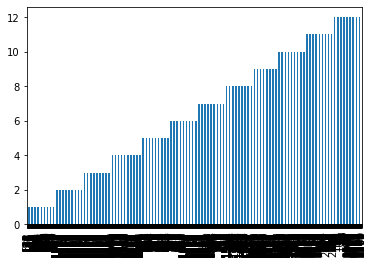

In [19]:
groups.sort_values().plot(kind="bar")

In [20]:
X_train = df_proc.loc[groups <= 10, df_proc.columns != "emotion"]
X_val = df_proc.loc[groups == 11, df_proc.columns != "emotion"]
X_train_val = df_proc.loc[groups <= 11, df_proc.columns != "emotion"]
X_test = df_proc.loc[groups == 12, df_proc.columns != "emotion"]

y_train = df_1.loc[groups <= 10, "emotion"]
y_val = df_1.loc[groups == 11, "emotion"]
y_train_val = df_1.loc[groups <= 11, "emotion"]
y_test = df_1.loc[groups == 12, "emotion"]

group_train = [x for x in groups if x <= 10]
group_val = [x for x in groups if x == 11]
group_train_val = [x for x in groups if x <= 11]
group_test = [x for x in groups if x == 12]

In [21]:
X_test

,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,...,mfcc_sma_de[14]_peakRangeAbs,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope
0,0.385139,0.281690,0.157277,0.018544,0.073291,0.141342,0.054748,0.068050,0.122798,0.001566,...,4.823022,0.401732,2.090930,2.099112,-19.944317,0.746226,102.882890,61.312977,94.098900,66.808334
1,0.561725,0.460123,0.000000,0.009667,0.016030,0.166888,0.006363,0.150858,0.157221,0.001034,...,6.337922,0.531333,2.099723,2.114669,-19.700634,0.551186,93.073006,47.151035,105.535260,59.164124
2,0.727562,0.543478,0.063043,0.011761,0.117592,0.256577,0.105831,0.138985,0.244816,0.001759,...,7.872200,0.550207,2.569344,2.558424,19.927574,0.498201,119.243800,63.197002,120.075630,55.388153
3,1.134952,0.538117,0.183857,0.021584,0.205842,0.615045,0.184257,0.409203,0.593461,0.004722,...,7.100907,0.463878,2.547057,2.531225,19.786592,0.556079,117.838540,72.701700,132.015240,82.347770
4,0.778833,0.313099,0.881789,0.028278,0.203587,0.379197,0.175310,0.175609,0.350919,0.001034,...,9.980969,0.677555,2.336470,2.349155,-19.851357,0.447052,96.824940,51.860687,96.603280,44.682507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,0.426684,0.423423,0.015015,0.002771,0.039821,0.189588,0.037050,0.149767,0.186817,0.001034,...,7.450012,0.726470,1.734258,1.721241,19.660307,0.441148,90.856040,49.285130,77.540940,49.632137
2240,0.342262,0.566474,0.014451,0.001848,0.015536,0.173161,0.013688,0.157625,0.171313,0.001034,...,3.782106,0.409569,2.029885,2.017333,19.789406,0.517791,89.909900,38.495705,77.015144,39.274765
2241,5.679146,0.432432,0.056757,0.005816,0.042871,2.748744,0.037056,2.705873,2.742929,0.001034,...,16.296577,0.568282,4.823412,4.826412,-19.999996,0.366667,187.048540,155.453430,167.877560,156.913480
2242,1.279300,0.595349,0.000000,0.012690,0.074794,0.406943,0.062105,0.332148,0.394253,0.001034,...,8.903690,0.480540,2.736283,2.731294,19.997248,0.513262,115.817670,63.099950,112.980515,60.394127


### Check de nulos

In [20]:
df_proc.isnull().mean() * 100

audspec_lengthL1norm_sma_range        0.0
audspec_lengthL1norm_sma_maxPos       0.0
audspec_lengthL1norm_sma_minPos       0.0
audspec_lengthL1norm_sma_quartile1    0.0
audspec_lengthL1norm_sma_quartile2    0.0
                                     ... 
mfcc_sma_de[14]_minRangeRel           0.0
mfcc_sma_de[14]_meanRisingSlope       0.0
mfcc_sma_de[14]_stddevRisingSlope     0.0
mfcc_sma_de[14]_meanFallingSlope      0.0
mfcc_sma_de[14]_stddevFallingSlope    0.0
Length: 6373, dtype: float64

In [21]:
df_proc.audspec_lengthL1norm_sma_range.isna().value_counts()

False    2452
Name: audspec_lengthL1norm_sma_range, dtype: int64

In [22]:
percent_missing = df_proc.isnull().sum() * 100 / len(df_proc)
missing_value_df = pd.DataFrame({'column_name': df_proc.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_range,0.0
audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_maxPos,0.0
audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_minPos,0.0
audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile1,0.0
audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile2,0.0
...,...,...
mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_minRangeRel,0.0
mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_meanRisingSlope,0.0
mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,0.0
mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_meanFallingSlope,0.0


In [23]:
df_proc.dropna()

,audspec_lengthL1norm_sma_range,audspec_lengthL1norm_sma_maxPos,audspec_lengthL1norm_sma_minPos,audspec_lengthL1norm_sma_quartile1,audspec_lengthL1norm_sma_quartile2,audspec_lengthL1norm_sma_quartile3,audspec_lengthL1norm_sma_iqr1-2,audspec_lengthL1norm_sma_iqr2-3,audspec_lengthL1norm_sma_iqr1-3,audspec_lengthL1norm_sma_percentile1.0,...,mfcc_sma_de[14]_peakRangeAbs,mfcc_sma_de[14]_peakRangeRel,mfcc_sma_de[14]_peakMeanAbs,mfcc_sma_de[14]_peakMeanMeanDist,mfcc_sma_de[14]_peakMeanRel,mfcc_sma_de[14]_minRangeRel,mfcc_sma_de[14]_meanRisingSlope,mfcc_sma_de[14]_stddevRisingSlope,mfcc_sma_de[14]_meanFallingSlope,mfcc_sma_de[14]_stddevFallingSlope
0,0.385139,0.281690,0.157277,0.018544,0.073291,0.141342,0.054748,0.068050,0.122798,0.001566,...,4.823022,0.401732,2.090930,2.099112,-19.944317,0.746226,102.882890,61.312977,94.098900,66.808334
1,0.561725,0.460123,0.000000,0.009667,0.016030,0.166888,0.006363,0.150858,0.157221,0.001034,...,6.337922,0.531333,2.099723,2.114669,-19.700634,0.551186,93.073006,47.151035,105.535260,59.164124
2,0.727562,0.543478,0.063043,0.011761,0.117592,0.256577,0.105831,0.138985,0.244816,0.001759,...,7.872200,0.550207,2.569344,2.558424,19.927574,0.498201,119.243800,63.197002,120.075630,55.388153
3,1.134952,0.538117,0.183857,0.021584,0.205842,0.615045,0.184257,0.409203,0.593461,0.004722,...,7.100907,0.463878,2.547057,2.531225,19.786592,0.556079,117.838540,72.701700,132.015240,82.347770
4,0.778833,0.313099,0.881789,0.028278,0.203587,0.379197,0.175310,0.175609,0.350919,0.001034,...,9.980969,0.677555,2.336470,2.349155,-19.851357,0.447052,96.824940,51.860687,96.603280,44.682507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,0.988671,0.732010,0.111663,0.009924,0.154906,0.412373,0.144982,0.257467,0.402449,0.004148,...,6.529662,0.339508,2.120281,2.125838,-19.986767,0.627271,104.754720,58.425606,94.505700,62.464710
2448,2.178936,0.426923,0.148077,0.029455,0.345454,0.741444,0.315999,0.395990,0.711989,0.002999,...,7.142216,0.637974,2.066742,2.069246,-19.999676,0.494796,105.382580,48.022625,108.072044,47.946903
2449,0.960728,0.552273,0.106818,0.008406,0.221815,0.521405,0.213409,0.299590,0.512999,0.002165,...,6.196844,0.510754,2.277397,2.280077,-19.999725,0.461740,91.471420,50.930830,102.921720,49.431090
2450,1.957502,0.444954,0.160550,0.012579,0.356950,0.960245,0.344371,0.603295,0.947667,0.003956,...,8.370708,0.443241,2.645027,2.663047,-19.730980,0.548099,101.806080,59.485172,121.376724,80.235700


### Método elegido



### Random Forests


In [26]:
from sklearn.ensemble import RandomForestClassifier

random_model = RandomForestClassifier(n_estimators=360, random_state=PARAM_RANDOM_STATE)
random_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=360,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [27]:
pickle.dump(random_model, open("06.01.Random_forest.compare_2016.pkl", "wb"))

In [28]:
print("Accuracy training : {:.3f}".format(random_model.score(X_train, y_train)))
print("Accuracy test: {:.3f}".format(random_model.score(X_test, y_test)))

Accuracy training : 1.000
Accuracy test: 0.149


In [29]:
# df_proc.loc[:, df_proc.columns != "emotion"],
#     df_proc["emotion"],
    
importancia_predictores = pd.DataFrame(
    {"Predictor": df_proc.loc[:, df_proc.columns != "emotion"], "Importancia": random_model.feature_importances_}
)
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values("Importancia", ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,Predictor,Importancia
5201,"(m, f, c, c, _, s, m, a, [, 2, ], _, s, t, d, ...",0.000372
3349,"(m, f, c, c, _, s, m, a, _, d, e, [, 5, ], _, ...",0.000369
3274,"(m, f, c, c, _, s, m, a, _, d, e, [, 2, ], _, ...",0.000367
5779,"(a, u, d, S, p, e, c, _, R, f, i, l, t, _, s, ...",0.000361
6243,"(m, f, c, c, _, s, m, a, _, d, e, [, 6, ], _, ...",0.000357
...,...,...
2794,"(p, c, m, _, f, f, t, M, a, g, _, f, b, a, n, ...",0.000000
2825,"(p, c, m, _, f, f, t, M, a, g, _, s, p, e, c, ...",0.000000
3197,"(p, c, m, _, f, f, t, M, a, g, _, s, p, e, c, ...",0.000000
3135,"(p, c, m, _, f, f, t, M, a, g, _, s, p, e, c, ...",0.000000


In [30]:
y_pred_test = random_model.predict(X_test)
y_pred_train = random_model.predict(X_train)
# evaluación
print("Accuracy training : {:.3f}".format(random_model.score(X_train, y_train)))
print("Accuracy test: {:.3f}".format(random_model.score(X_test, y_test)))
print("Train acc: {}".format(accuracy_score(y_train, y_pred_train)))
print("Test acc: {}".format(accuracy_score(y_test, y_pred_test)))
print("Test recall: {}".format(recall_score(y_test, y_pred_test, average='weighted')))
print("Test F1: {}".format(fbeta_score(y_test, y_pred_test, beta=1, average='weighted')))
print("Test F2: {}".format(fbeta_score(y_test, y_pred_test, beta=2, average='weighted')))

Accuracy training : 1.000
Accuracy test: 0.149
Train acc: 0.99950884086444
Test acc: 0.14903846153846154
Test recall: 0.14903846153846154
Test F1: 0.12507900896854077
Test F2: 0.13781955492142656


In [31]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.14      0.22      0.17        32
           3       0.17      0.28      0.21        32
           4       0.17      0.25      0.20        32
           5       0.12      0.09      0.11        32
           6       0.12      0.12      0.12        32
           7       0.00      0.00      0.00        16
           8       0.00      0.00      0.00        16

    accuracy                           0.15       208
   macro avg       0.09      0.12      0.10       208
weighted avg       0.11      0.15      0.13       208



C:\Users\lbertolini\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
# Accuracy training : 1.000
# Accuracy test: 0.125
# Train acc: 0.99950884086444
# Test acc: 0.125
# Test recall: 0.125
# Test F1: 0.1033376262291925
# Test F2: 0.11506721152996646

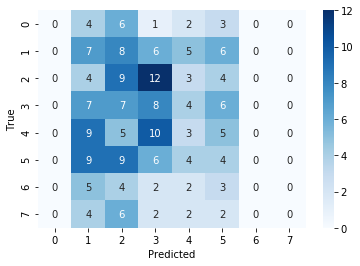

In [33]:
cm = confusion_matrix(y_test, y_pred_test)
matriz_n_aria = sns.heatmap(cm, cmap="Blues", annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("True")


matriz_n_aria .figure.savefig(
    "06.02.Compare_2016.Random_forest.matriz.png", bbox_inches='tight'
)

### AdaBoost

In [22]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_model = AdaBoostClassifier(
    DecisionTreeClassifier(class_weight="balanced"),
    n_estimators=1335,
    learning_rate=1.6709999999999996,
#     n_estimators=85,
#     learning_rate=2.8409999999999993,
    random_state=PARAM_RANDOM_STATE
)

In [23]:
#     n_estimators=85,
#     learning_rate=2.8409999999999993,
# Accuracy training : 1.000
# Accuracy test: 0.163
# Train acc: 0.99950884086444
# Test acc: 0.16346153846153846
# Test recall: 0.16346153846153846
# Test F1: 0.141850321696869
# Test F2: 0.1539446123767614

In [ ]:
start = time.time()
adaboost_model.fit(X_train, y_train)
end = time.time()

In [ ]:
pickle.dump(adaboost_model, open("06.02.AdaBoost.compare_2016.pkl", "wb"))

In [ ]:
print(f"Tiempo: { round(end - start, 2) } segundos")

In [ ]:
# matriz de confusión y classification_report
y_pred_test = adaboost_model.predict(X_test)
y_pred_train = adaboost_model.predict(X_train)

# evaluación
print("Accuracy training : {:.3f}".format(adaboost_model.score(X_train, y_train)))
print("Accuracy test: {:.3f}".format(adaboost_model.score(X_test, y_test)))
print("Train acc: {}".format(accuracy_score(y_train, y_pred_train)))
print("Test acc: {}".format(accuracy_score(y_test, y_pred_test)))
print("Test recall: {}".format(recall_score(y_test, y_pred_test, average='weighted')))
print("Test F1: {}".format(fbeta_score(y_test, y_pred_test, beta=1, average='weighted')))
print("Test F2: {}".format(fbeta_score(y_test, y_pred_test, beta=2, average='weighted')))

In [ ]:
print(classification_report(y_test, y_pred_test))

In [ ]:
# Accuracy training : 1.000
# Accuracy test: 0.163
# Train acc: 0.99950884086444
# Test acc: 0.16346153846153846
# Test recall: 0.16346153846153846
# Test F1: 0.141850321696869
# Test F2: 0.1539446123767614

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
matriz_n_aria = sns.heatmap(cm, cmap="Blues", annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("True")


matriz_n_aria .figure.savefig(
    "06.02.Compare_2016.Adaboost.matriz.png", bbox_inches='tight'
)